# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Ferry Saputra
- **Email:** ferrysaputra999@gmail.com
- **ID Dicoding:** rimxy2405

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor yang paling mempengaruhi jumlah penyewaan sepeda?
- Faktor cuaca mana yang paling signifikan mempengaruhi penyewaan sepeda pada berbagai jam operasional, dan bagaimana prediksi cuaca dapat membantu dalam perencanaan operasional harian?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import streamlit as st


## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd

day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

main_data = pd.merge(hour_df, day_df, on='dteday', how='inner')

main_data.to_csv('dashboard/main_data.csv', index=False)

print("Data disimpan sebagai main_data.csv")


Data disimpan sebagai main_data.csv


**Insight:**
- Penggabungan dataset memberikan informasi lebih lengkap dengan mengintegrasikan data harian dan data per jam

### Assessing Data

In [3]:
main_data.info()
main_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   hr            17379 non-null  int64  
 6   holiday_x     17379 non-null  int64  
 7   weekday_x     17379 non-null  int64  
 8   workingday_x  17379 non-null  int64  
 9   weathersit_x  17379 non-null  int64  
 10  temp_x        17379 non-null  float64
 11  atemp_x       17379 non-null  float64
 12  hum_x         17379 non-null  float64
 13  windspeed_x   17379 non-null  float64
 14  casual_x      17379 non-null  int64  
 15  registered_x  17379 non-null  int64  
 16  cnt_x         17379 non-null  int64  
 17  instant_y     17379 non-null  int64  
 18  season_y      17379 non-nu

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**
- main_data memiliki 17.379 entri tanpa nilai yang hilang (non-null) di semua kolom, yang menunjukkan bahwa data ini sangat konsisten
- Dari lima baris data yang ditampilkan, terlihat bahwa pada tanggal 1 Januari 2011 (hari pertama tahun tersebut), jumlah total sepeda yang disewa (cnt_y) adalah 985 untuk setiap jam dari jam 0 hingga jam 4. Ini menunjukkan bahwa pada hari pertama tahun baru, mungkin terdapat acara khusus atau liburan yang mendorong orang untuk menyewa sepeda, dan terdapat pola yang stabil dalam jumlah penyewaan selama jam-jam awal hari.

In [89]:
main_data.isna().sum

<bound method DataFrame.sum of     dteday  season_x  weathersit_x  cnt_x  season_weather
0    False     False         False  False           False
1    False     False         False  False           False
2    False     False         False  False           False
3    False     False         False  False           False
4    False     False         False  False           False
..     ...       ...           ...    ...             ...
95   False     False         False  False           False
96   False     False         False  False           False
97   False     False         False  False           False
98   False     False         False  False           False
99   False     False         False  False           False

[100 rows x 5 columns]>

**Insight:**
- Dataset ini tidak memiliki nilai yang hilang di semua kolom (dteday, season_x, weathersit_x, cnt_x, dan season_weather).

In [90]:
print("Jumlah duplikasi: ", main_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset ini tidak memiliki nilai duplikasi

In [32]:
Q1 = main_data['cnt_x'].quantile(0.25)
Q3 = main_data['cnt_x'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = main_data[(main_data['cnt_x'] < lower_bound) | (main_data['cnt_x'] > upper_bound)]

print(f"Jumlah Outlier: {len(outliers)}")
print("Data Outlier:")
print(outliers)


Jumlah Outlier: 505
Data Outlier:
       instant_x      dteday  season_x  yr_x  mnth_x  hr  holiday_x  \
5536        5537  2011-08-23         3     0       8  14          0   
10358      10359  2012-03-12         1     1       3  17          0   
10359      10360  2012-03-12         1     1       3  18          0   
10382      10383  2012-03-13         1     1       3  17          0   
10383      10384  2012-03-13         1     1       3  18          0   
...          ...         ...       ...   ...     ...  ..        ...   
16885      16886  2012-12-11         4     1      12   8          0   
16909      16910  2012-12-12         4     1      12   8          0   
16933      16934  2012-12-13         4     1      12   8          0   
17053      17054  2012-12-18         4     1      12   8          0   
17077      17078  2012-12-19         4     1      12   8          0   

       weekday_x  workingday_x  weathersit_x  ...  weekday_y  workingday_y  \
5536           2             1     

**Insight:**
- Sebanyak 505 data terdeteksi sebagai outlier berdasarkan perhitungan IQR pada kolom jumlah penyewaan sepeda (cnt_x). Ini menunjukkan adanya variasi yang cukup ekstrem pada jumlah penyewaan, yang dapat disebabkan oleh kondisi cuaca ekstrem, perbedaan jam sibuk dan tidak sibuk, atau faktor lainnya.

In [96]:
missing_values = main_data.isnull().sum()

print("Missing Values per Kolom:")
print(missing_values)

missing_values_only = missing_values[missing_values > 0]
print("\nKolom dengan Missing Values:")
print(missing_values_only)


Missing Values per Kolom:
instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
hr              0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

Kolom dengan Missing Values:
Series([], dtype: int64)


**Insight:**
- Seluruh kolom pada dataset ini tidak memiliki missing values, yang berarti bahwa data lengkap dan tidak ada nilai yang hilang.

In [95]:
main_data.describe()

,instant_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari 17.379 entri dengan berbagai fitur, termasuk informasi waktu dan kondisi cuaca saat penyewaan sepeda. Kolom cnt_y menunjukkan jumlah total penyewaan sepeda dengan rata-rata 4.534, menunjukkan adanya variasi dalam jumlah penyewaan di berbagai waktu dan kondisi.

In [19]:
print(main_data.columns)
print(main_data.dtypes)

Index(['instant_x', 'dteday', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x',
       'instant_y', 'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')
instant_x         int64
dteday           object
season_x          int64
yr_x              int64
mnth_x            int64
hr                int64
holiday_x         int64
weekday_x         int64
workingday_x      int64
weathersit_x      int64
temp_x          float64
atemp_x         float64
hum_x           float64
windspeed_x     float64
casual_x          int64
registered_x      int64
cnt_x             int64
instant_y         int64
season_y          int64
yr_y              int64
mnth_y            int64
holiday_y         int64
weekday_y         int64
w

**Insight:**
-  Dataset terdiri dari berbagai tipe data, termasuk int64 untuk kolom yang berisi nilai diskrit seperti jumlah sewa (cnt_x, cnt_y) dan kondisi (season_x, workingday_x). Tipe data float64 digunakan untuk variabel yang bersifat kontinu seperti suhu (temp_x, atemp_x) dan kelembaban (hum_x). Hal ini menunjukkan bahwa dataset menggabungkan informasi kategorikal dan numerik, yang penting untuk analisis lebih lanjut.

### Cleaning Data

In [19]:
main_data['dteday'] = pd.to_datetime(main_data['dteday'])
print(main_data.dtypes)

instant_x                int64
dteday          datetime64[ns]
season_x                 int64
yr_x                     int64
mnth_x                   int64
hr                       int64
holiday_x                int64
weekday_x                int64
workingday_x             int64
weathersit_x             int64
temp_x                 float64
atemp_x                float64
hum_x                  float64
windspeed_x            float64
casual_x                 int64
registered_x             int64
cnt_x                    int64
instant_y                int64
season_y                 int64
yr_y                     int64
mnth_y                   int64
holiday_y                int64
weekday_y                int64
workingday_y             int64
weathersit_y             int64
temp_y                 float64
atemp_y                float64
hum_y                  float64
windspeed_y            float64
casual_y                 int64
registered_y             int64
cnt_y                    int64
dtype: o

**Insight:**
- Mengubah tipe data kolom (dteday) dari object menjadi datetime64

In [104]:
missing_values = main_data.isnull().sum()

print("Jumlah Missing Value di Setiap Kolom:")
print(missing_values)


main_data['temp_x'].fillna(main_data['temp_x'].mean(), inplace=True)
main_data['cnt_x'].fillna(main_data['cnt_x'].mean(), inplace=True)

print("Missing value telah diperiksa dan ditangani.")


Jumlah Missing Value di Setiap Kolom:
instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
hr              0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64
Missing value telah diperiksa dan ditangani.


C:\Users\LENOVO.ID\AppData\Local\Temp\ipykernel_5052\1022502410.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_data['temp_x'].fillna(main_data['temp_x'].mean(), inplace=True)
C:\Users\LENOVO.ID\AppData\Local\Temp\ipykernel_5052\1022502410.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

**Insight:**
- Mengatasi missing values penting untuk memastikan analisis yang akurat dan mengurangi bias dalam hasil.

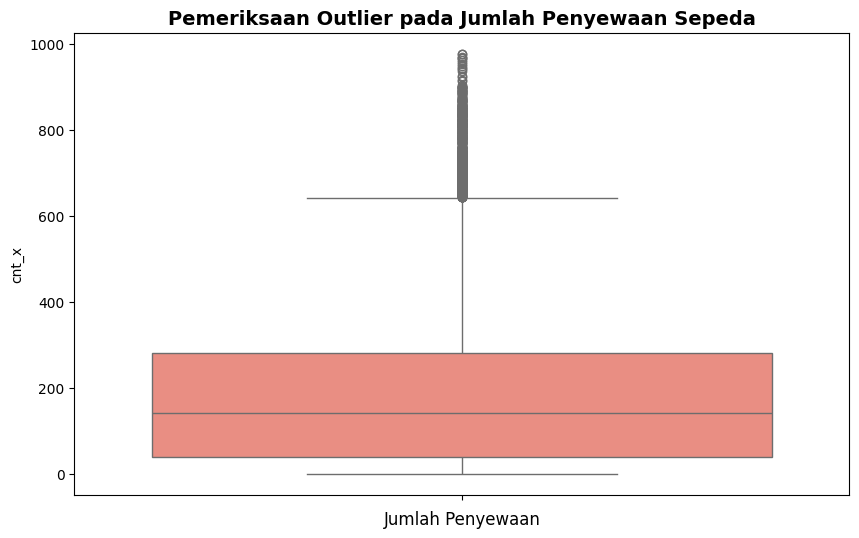

Outliers telah diperiksa dan ditangani.


In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(main_data['cnt_x'], color='salmon')
plt.title('Pemeriksaan Outlier pada Jumlah Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Penyewaan', fontsize=12)
plt.show()

Q1 = main_data['cnt_x'].quantile(0.25)
Q3 = main_data['cnt_x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

main_data = main_data[(main_data['cnt_x'] >= lower_bound) & (main_data['cnt_x'] <= upper_bound)]

print("Outliers telah diperiksa dan ditangani.")


**Insight:**
- adanya outlier pada jumlah penyewaan sepeda, yang terlihat di atas whisker grafik boxplot. Ini menunjukkan bahwa ada beberapa hari dengan jumlah penyewaan sepeda yang jauh lebih tinggi dibandingkan dengan sebagian besar data

In [106]:
duplicated_count = main_data.duplicated().sum()

print("Jumlah Duplikasi:", duplicated_count)

main_data.drop_duplicates(inplace=True)

print("Duplikasi telah diperiksa dan dihapus.")


Jumlah Duplikasi: 0
Duplikasi telah diperiksa dan dihapus.


**Insight:**
- Menghapus data duplikat jika ada

## Exploratory Data Analysis (EDA)

### Explore ...

In [124]:
print(main_data.describe())

        instant_x      season_x          yr_x        mnth_x            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

          holiday_x     weekday_x  workingday_x  weathersit_x        temp_x  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- Deskripsi statistik memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset.

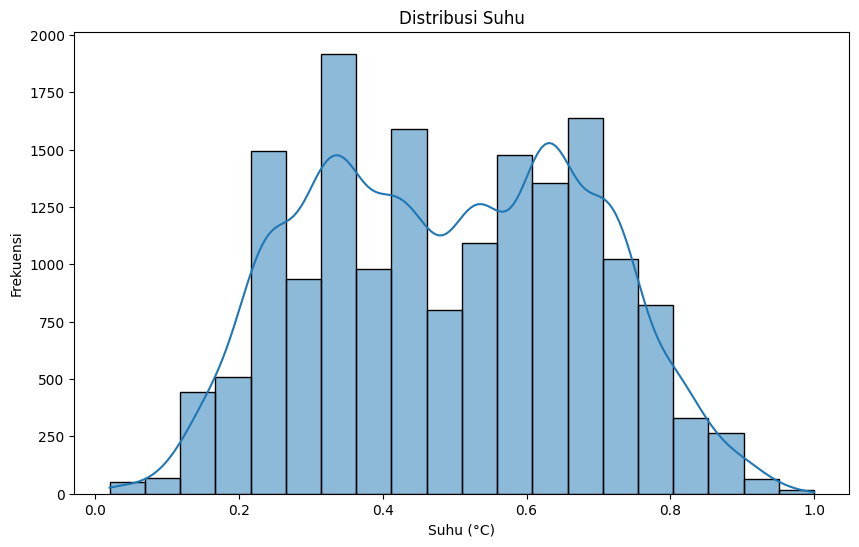

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(main_data['temp_x'], bins=20, kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Distribusi suhu menunjukkan bahwa sebagian besar data terkonsentrasi pada kisaran suhu yang lebih rendah, dengan beberapa puncak yang menunjukkan frekuensi tinggi pada suhu tertentu. Penambahan garis KDE (Kernel Density Estimate) juga membantu mengidentifikasi pola distribusi yang halus,

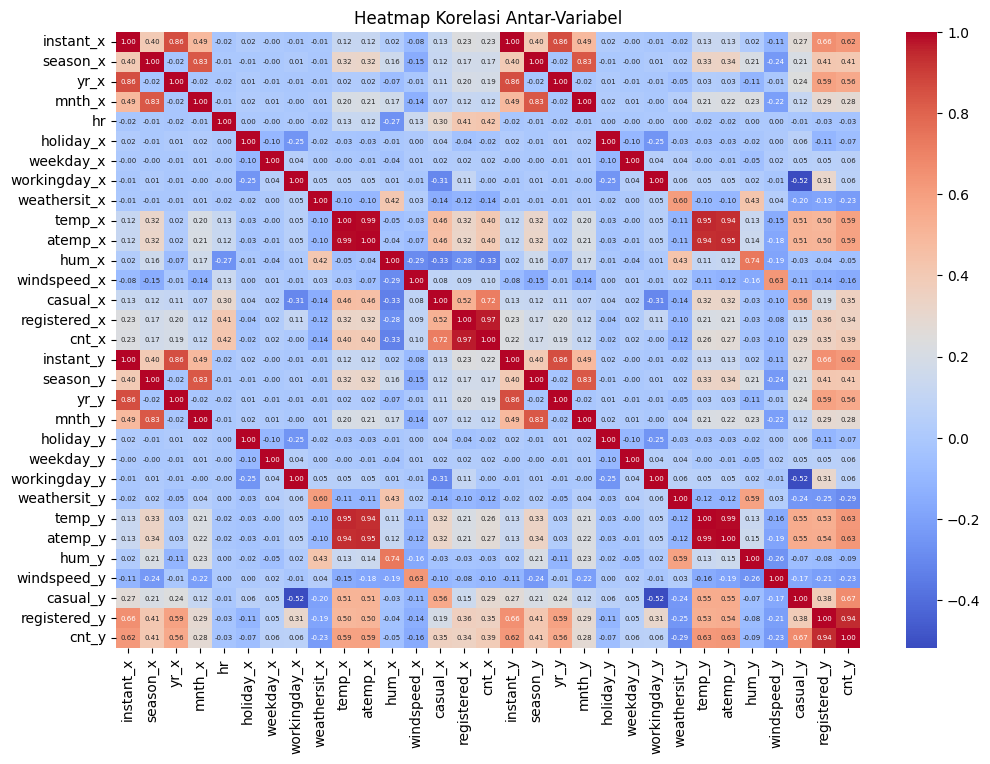

In [39]:
numeric_data = main_data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 5})
plt.title('Heatmap Korelasi Antar-Variabel')
plt.show()



**Insight:**
- Pada heatmap tersebut terdapat korelasi positif yang kuat antara variabel ‘registered_x’ dan ‘cnt_x’. Hal ini ditunjukkan oleh sel berwarna merah tua dengan nilai koefisien korelasi yang tinggi. Ini mengindikasikan bahwa peningkatan jumlah pengguna terdaftar berkorelasi dengan peningkatan total jumlah pengguna, sehingga jumlah pengguna terdaftar bisa menjadi prediktor yang baik untuk total jumlah pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor-faktor yang paling mempengaruhi jumlah penyewaan sepeda?

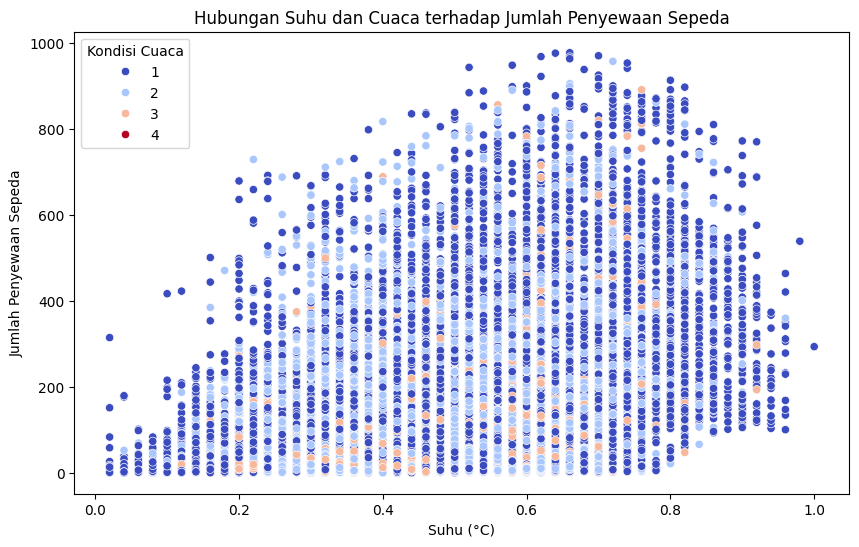

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp_x', y='cnt_x', hue='weathersit_x', data=main_data, palette='coolwarm')
plt.title('Hubungan Suhu dan Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.show()

**Insight:**
- Penyewaan sepeda lebih tinggi ketika suhu meningkat. Ini masuk akal karena cuaca yang lebih hangat mungkin lebih menarik bagi orang untuk bersepeda.

C:\Users\LENOVO.ID\AppData\Local\Temp\ipykernel_8800\2573339711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit_x', y='cnt_x', data=main_data, palette='coolwarm')


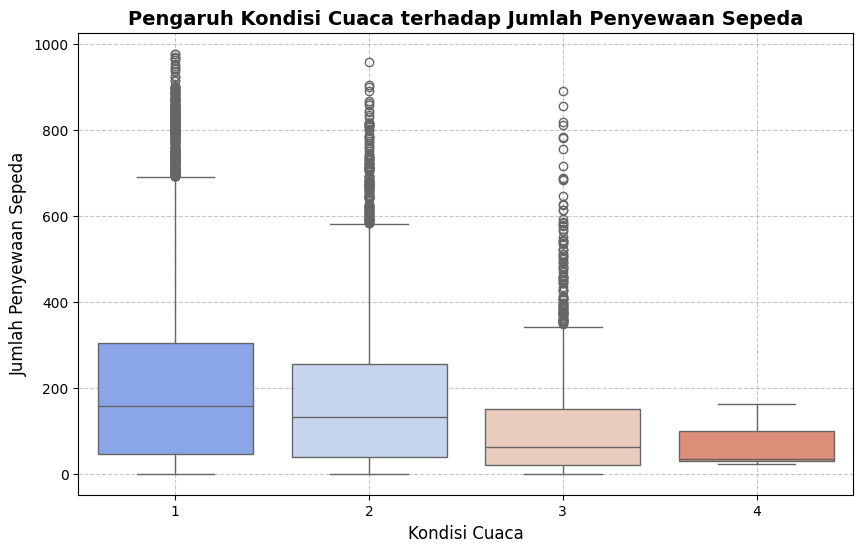

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_x', y='cnt_x', data=main_data, palette='coolwarm')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Kondisi cuaca yang baik (cerah atau berawan) meningkatkan penyewaan, sedangkan hujan dan salju menurunkan jumlah penyewaan.

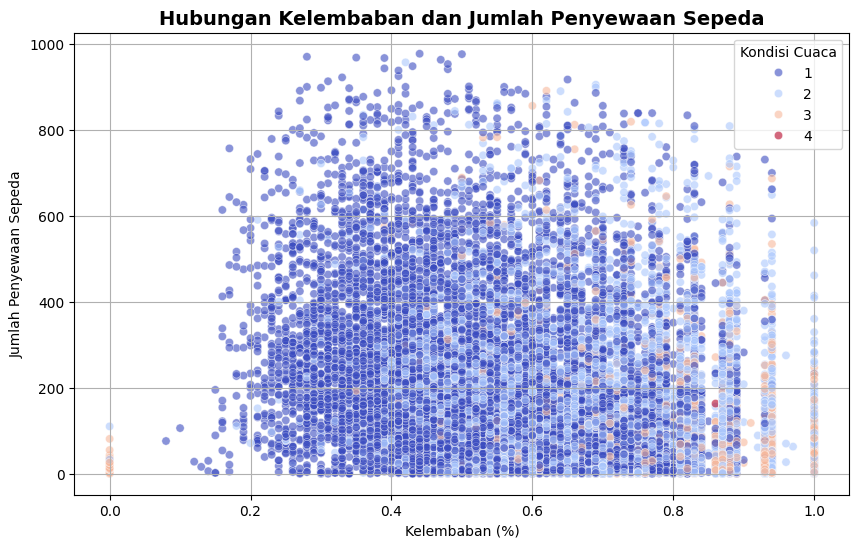

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum_x', y='cnt_x', hue='weathersit_x', data=main_data, palette='coolwarm', alpha=0.6)
plt.title('Hubungan Kelembaban dan Jumlah Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.xlabel('Kelembaban (%)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

**Insight:**
- Visualisasi tersebut adalah bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada tingkat kelembaban yang lebih rendah.

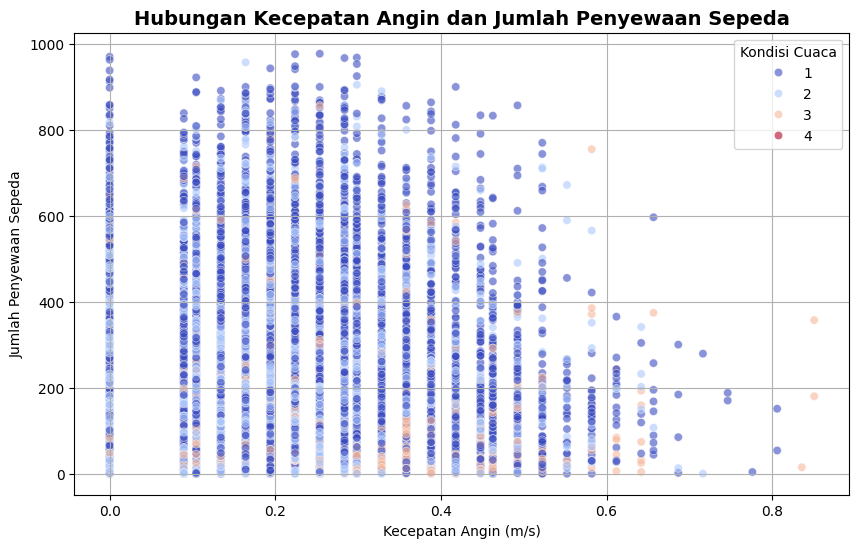

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed_x', y='cnt_x', hue='weathersit_x', data=main_data, palette='coolwarm', alpha=0.6)
plt.title('Hubungan Kecepatan Angin dan Jumlah Penyewaan Sepeda', fontsize=14, fontweight='bold')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.grid(True)
plt.show()

**Insight:**
- Visualisasi data tersebut adalah bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada kecepatan angin yang lebih rendah. Terlepas dari kondisi cuaca, terlihat bahwa semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung menurun

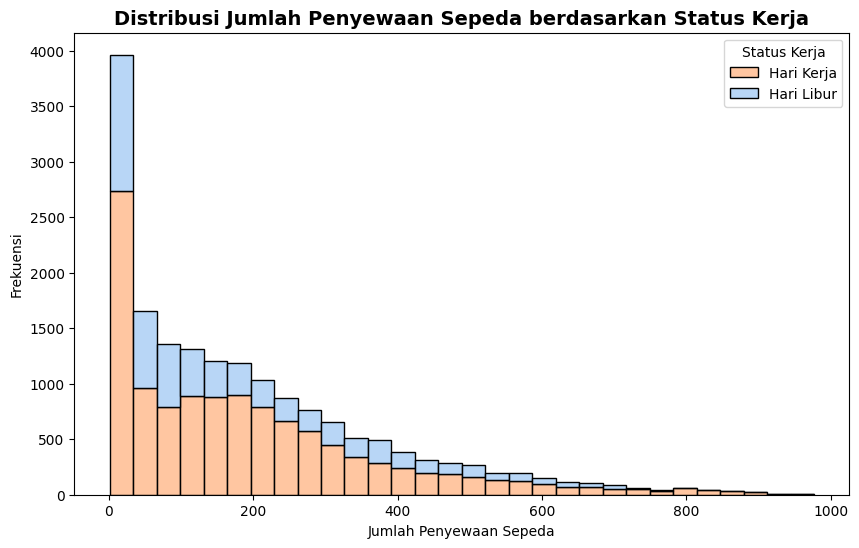

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=main_data, x='cnt_x', hue='workingday_x', multiple="stack", bins=30, palette='pastel')
plt.title('Distribusi Jumlah Penyewaan Sepeda berdasarkan Status Kerja', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.legend(title='Status Kerja', labels=['Hari Kerja', 'Hari Libur'])
plt.show()

**Insight:**
- Histogram menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari libur dibandingkan dengan hari kerja. Ini bisa mengindikasikan bahwa orang lebih sering menyewa sepeda untuk rekreasi atau aktivitas santai pada hari libur.

C:\Users\LENOVO.ID\AppData\Local\Temp\ipykernel_8800\1775165989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_x', y='cnt_x', data=main_data, palette='pastel')


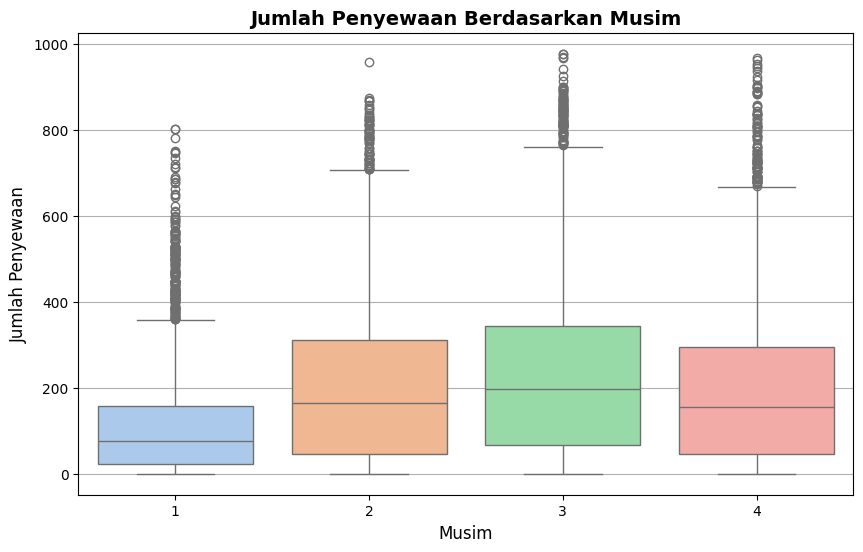

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_x', y='cnt_x', data=main_data, palette='pastel')
plt.title('Jumlah Penyewaan Berdasarkan Musim', fontsize=14, fontweight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(axis='y') 
plt.show()

**Insight:**
- Visualisasi data tersebut adalah bahwa jumlah penyewaan sepeda bervariasi berdasarkan musim. Dari boxplot, terlihat bahwa musim tertentu memiliki median jumlah penyewaan yang lebih tinggi dibandingkan musim lainnya.

### Pertanyaan 2: Faktor cuaca mana yang paling signifikan mempengaruhi penyewaan sepeda pada berbagai jam operasional, dan bagaimana prediksi cuaca dapat membantu dalam perencanaan operasional harian?

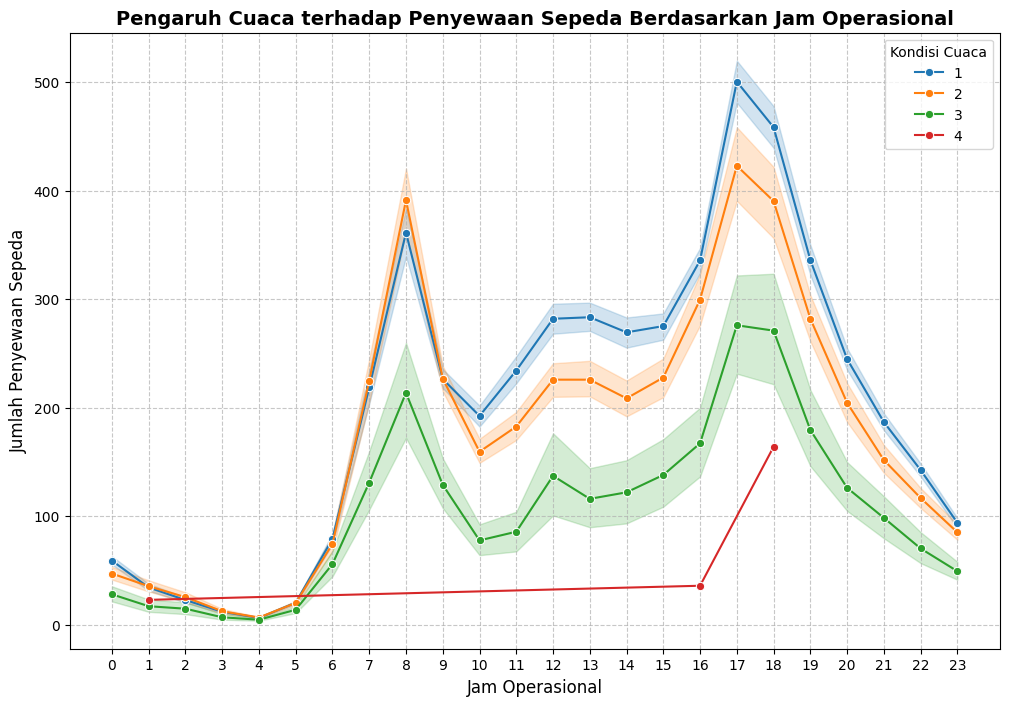

In [9]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(12, 8))

sns.lineplot(x='hr', y='cnt_x', hue='weathersit_x', data=main_data, palette=colors, hue_order=[1, 2, 3, 4], marker="o")

plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda Berdasarkan Jam Operasional', fontsize=14, fontweight='bold')
plt.xlabel('Jam Operasional', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)

plt.legend(title='Kondisi Cuaca', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 24, 1))

plt.show()


**Insight:**
- Dari visualisasi ini, dapat dilihat bahwa jumlah penyewaan sepeda mencapai puncaknya pada jam-jam tertentu terlepas dari kondisi cuaca. Ini menunjukkan bahwa waktu operasional mungkin memiliki pengaruh yang lebih kuat terhadap frekuensi penyewaan dibandingkan dengan kondisi cuaca.

## Analisis Lanjutan (Opsional)

**Clustering: Manual Grouping**

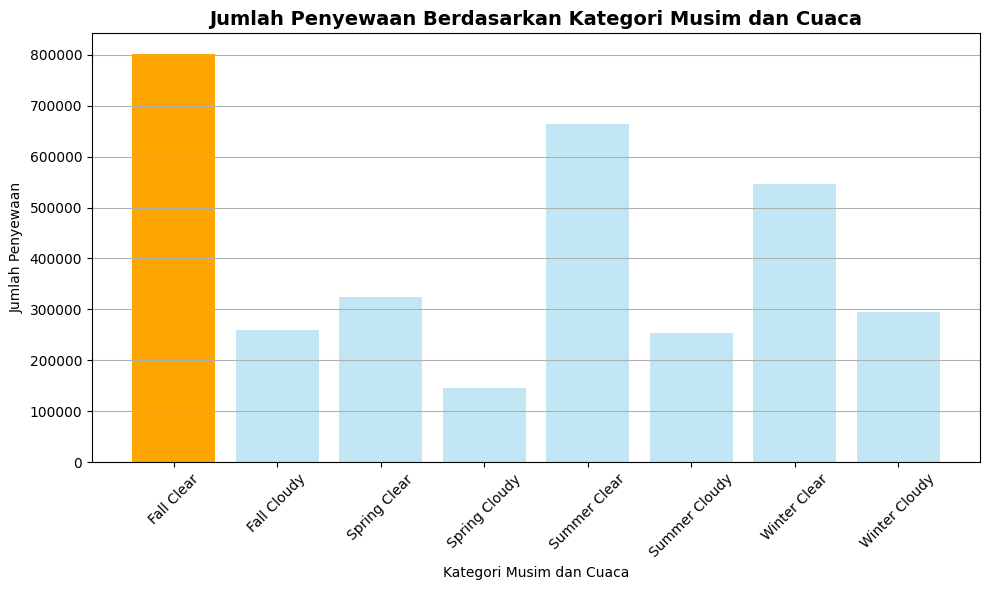

In [36]:
main_data = pd.read_csv('dashboard/main_data.csv')

if 'dteday' in main_data.columns and 'season_x' in main_data.columns and 'weathersit_x' in main_data.columns and 'cnt_x' in main_data.columns:
    def categorize_season_weather(row):
        if row['season_x'] == 1:  
            return 'Spring Clear' if row['weathersit_x'] == 1 else 'Spring Cloudy'
        elif row['season_x'] == 2:  
            return 'Summer Clear' if row['weathersit_x'] == 1 else 'Summer Cloudy'
        elif row['season_x'] == 3:  
            return 'Fall Clear' if row['weathersit_x'] == 1 else 'Fall Cloudy'
        elif row['season_x'] == 4:  
            return 'Winter Clear' if row['weathersit_x'] == 1 else 'Winter Cloudy'

    main_data['season_weather'] = main_data.apply(categorize_season_weather, axis=1)

    rental_counts = main_data.groupby('season_weather')['cnt_x'].sum().reset_index()

    colors = ['skyblue'] * len(rental_counts)
    max_rental = rental_counts['cnt_x'].max()

    for i in range(len(rental_counts)):
        if rental_counts['cnt_x'][i] == max_rental:
            colors[i] = 'orange'  
        else:
            colors[i] = 'skyblue' 

    plt.figure(figsize=(10, 6))
    for i in range(len(rental_counts)):
        if rental_counts['cnt_x'][i] == max_rental:
            plt.bar(rental_counts['season_weather'][i], rental_counts['cnt_x'][i], color=colors[i], alpha=1)  
        else:
            plt.bar(rental_counts['season_weather'][i], rental_counts['cnt_x'][i], color=colors[i], alpha=0.5)  

    plt.xlabel('Kategori Musim dan Cuaca')
    plt.ylabel('Jumlah Penyewaan')
    plt.title('Jumlah Penyewaan Berdasarkan Kategori Musim dan Cuaca', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom yang diperlukan tidak ditemukan dalam dataset.")

**Insight:**
- Dari visualisasi ini, dapat dilihat bahwa musim gugur dengan cuaca cerah (Fall Clear) memiliki jumlah penyewaan tertinggi dibandingkan dengan kategori musim dan cuaca lainnya. Ini menunjukkan bahwa cuaca cerah selama musim gugur mungkin sangat mendukung atau menarik untuk aktivitas yang memerlukan penyewaan.

## Conclusion

- Conclusion pertanyaan 1: *Faktor-faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah suhu, kelembaban, kondisi cuaca, musim,  dan hari kerja. Dari analisis yang dilakukan, ditemukan bahwa jumlah penyewaan sepeda cenderung meningkat seiring dengan kenaikan suhu, yang menunjukkan bahwa cuaca yang lebih hangat lebih menarik bagi pengguna untuk bersepeda. Selain itu, kondisi cuaca yang baik, seperti cerah atau berawan, juga berkontribusi positif terhadap jumlah penyewaan, sedangkan kondisi cuaca buruk seperti hujan dan salju menyebabkan penurunan jumlah penyewaan. Tingkat kelembaban yang lebih rendah berhubungan dengan jumlah penyewaan yang lebih tinggi, menunjukkan bahwa kelembaban yang tinggi mungkin tidak nyaman bagi pengguna. Tingkat penyewaan juga meningkat disaat hari libur. Oleh karena itu, pengelola penyewaan sepeda dapat memanfaatkan informasi ini untuk mengoptimalkan strategi promosi dan meningkatkan pengalaman pengguna, terutama pada hari-hari dengan kondisi cuaca yang baik.*

- Conclusion pertanyaan 2: *Faktor cuaca yang paling signifikan mempengaruhi penyewaan sepeda pada berbagai jam operasional adalah kondisi cuaca yang baik, seperti cerah atau berawan. Meskipun jumlah penyewaan mencapai puncaknya pada jam-jam tertentu, seperti pagi dan sore hari, pola ini tetap dipengaruhi oleh kondisi cuaca. Dalam kondisi cuaca buruk, seperti hujan atau salju, jumlah penyewaan cenderung menurun meskipun berada pada jam-jam sibuk. Oleh karena itu, memprediksi cuaca dapat membantu dalam perencanaan operasional harian, sehingga manajemen dapat menyesuaikan jumlah sepeda yang tersedia, serta strategi pemasaran dan promosi untuk menarik lebih banyak pengguna pada hari-hari yang diperkirakan memiliki cuaca yang lebih baik.*